# MTA Girl Scout Project

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Part 1: Upload MTA Data

In [124]:
#first I import a section of the MTA data just to make sure that I'm loading everything properly
mta_df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220305.txt')

In [125]:
mta_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530
...,...,...,...,...,...,...,...,...,...,...,...
209774,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/04/2022,04:00:00,REGULAR,0,23
209775,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/04/2022,08:00:00,REGULAR,0,23
209776,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/04/2022,12:00:00,REGULAR,0,23
209777,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/04/2022,16:00:00,REGULAR,0,23


In [126]:
#Next I iterate through 12 weeks worth of MTA data and concatenate them into one full data frame. 
#I copied this from the MTA exercises
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week in week_dates: #for each week
        file_url = url.format(week) #format the url so it grabs that week
        dfs.append(pd.read_csv(file_url)) #append to our empty list
    return pd.concat(dfs) #combine files for each week
        
week_dates = [220305, 220226, 220219, 220212, 220205, 220129, 220122, 220115, 220108, 220101, 211225, 211218]
turnstiles_df = get_data(week_dates)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530
...,...,...,...,...,...,...,...,...,...,...,...
210135,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/17/2021,04:00:00,REGULAR,5562,953
210136,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/17/2021,08:00:00,REGULAR,5562,954
210137,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/17/2021,12:00:00,REGULAR,5562,954
210138,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/17/2021,16:00:00,REGULAR,5562,958


### Part 2: Convert to DateTime

In [127]:
#I create a DATE_TIME column which combines the date and time column and converts into a datetime data type
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df["DATE"] + ' ' + turnstiles_df['TIME'])

In [128]:
#Used a data mask to filter all the data points that were greater than or equal to 3pm
turnstiles_df = turnstiles_df[turnstiles_df['DATE_TIME'].dt.hour>=15].sort_values('DATE_TIME')

In [129]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
185298,R423,R429,00-00-03,PELHAM BAY PARK,6,IRT,12/11/2021,15:00:00,REGULAR,3709971,3857934,2021-12-11 15:00:00
49211,N025,R102,01-06-00,125 ST,ACBD,IND,12/11/2021,15:00:00,REGULAR,3130489,1496677,2021-12-11 15:00:00
114693,N606,R025,00-00-07,JAMAICA CENTER,EJZ,IND,12/11/2021,15:00:00,REGULAR,29866326,4905567,2021-12-11 15:00:00
114651,N606,R025,00-00-06,JAMAICA CENTER,EJZ,IND,12/11/2021,15:00:00,REGULAR,12937383,3192669,2021-12-11 15:00:00
25253,C027,R216,00-00-00,BAY RIDGE-95 ST,R,BMT,12/11/2021,15:00:00,REGULAR,5384072,7482623,2021-12-11 15:00:00


In [130]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
122798,PTH10,R547,00-00-03,9TH STREET,1,PTH,03/04/2022,23:56:17,REGULAR,182378,514554,2022-03-04 23:56:17
129474,PTH22,R540,00-03-05,PATH NEW WTC,1,PTH,03/04/2022,23:57:18,REGULAR,112294,176691,2022-03-04 23:57:18
128594,PTH22,R540,00-00-07,PATH NEW WTC,1,PTH,03/04/2022,23:57:32,REGULAR,8841,3435,2022-03-04 23:57:32
117366,PTH01,R549,00-00-07,NEWARK HW BMEBE,1,PTH,03/04/2022,23:58:20,REGULAR,61886,32461,2022-03-04 23:58:20
123317,PTH12,R542,00-00-00,TWENTY THIRD ST,1,PTH,03/04/2022,23:59:11,REGULAR,155490,16956,2022-03-04 23:59:11


### Part 3: Clean Data

In [131]:
# I noticed that the EXITS column had a bunch of spaces, and it was the only column name with this issue
# Used the .rename() method to rename the column name
turnstiles_df.rename(columns = 
                     {'EXITS                                                               ':'EXITS'}, inplace = True)

In [132]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [133]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
256108,N039,R251,01-00-02,96 ST,2022-01-25 19:00:00,2
987091,R533,R055,00-03-01,FLUSHING-MAIN,2022-01-29 15:00:00,2
255856,N039,R251,01-00-01,96 ST,2022-01-25 19:00:00,2
255604,N039,R251,01-00-00,96 ST,2022-01-25 19:00:00,2
71768,B013,R196,01-00-01,PROSPECT PARK,2021-12-29 15:00:00,2


In [134]:
# It looks like there were dulicate entries for a handful of dates. Below is an example
mask = ((turnstiles_df["C/A"] == "N039") & 
(turnstiles_df["UNIT"] == "R251") & 
(turnstiles_df["SCP"] == "01-00-02") & 
(turnstiles_df["STATION"] == "96 ST") &
(turnstiles_df["DATE"] == '01/25/2022') &
(turnstiles_df["TIME"] == '19:00:00'))

turnstiles_df[mask].head()
#We can see that under column DESC one entry contains RECOVR AUD rather than REGULAR

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
50290,N039,R251,01-00-02,96 ST,BC,IND,01/25/2022,19:00:00,RECOVR AUD,6557112,6373929,2022-01-25 19:00:00
50289,N039,R251,01-00-02,96 ST,BC,IND,01/25/2022,19:00:00,REGULAR,6557113,6373930,2022-01-25 19:00:00


In [135]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [136]:
# We can see that now all the duplicate entries have been removed
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-12-11 15:00:00,1
710519,R141,R031,00-03-04,34 ST-PENN STA,2022-03-02 15:00:00,1
710521,R141,R031,00-03-04,34 ST-PENN STA,2022-03-02 23:00:00,1
710522,R141,R031,00-03-04,34 ST-PENN STA,2022-03-03 15:00:00,1
710523,R141,R031,00-03-04,34 ST-PENN STA,2022-03-03 19:00:00,1


In [137]:
# Dropping the ENTRIES and DESC columns
# I will only focus on the EXITS data as this tracks the number of people leaving the station on their way home
# Also copied from the MTA Exercises
turnstiles_df = turnstiles_df.drop(["DESC"], axis=1, errors="ignore")

In [138]:
# Group data by turnstiles to calculate the max entries per turnstile per day (as the entries are cumulative)
turnstiles_daily = turnstiles_df.groupby(['C/A', 'UNIT', 'SCP', 'STATION','DATE'], as_index = False).EXITS.first()

In [139]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,01/01/2022,2649668
1,A002,R051,02-00-00,59 ST,01/02/2022,2649829
2,A002,R051,02-00-00,59 ST,01/03/2022,2650233
3,A002,R051,02-00-00,59 ST,01/04/2022,2650658
4,A002,R051,02-00-00,59 ST,01/05/2022,2651066


In [140]:
# Create two columns to show the difference in daily exits

turnstiles_daily[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_27324/3219093088.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily


In [141]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,01/01/2022,2649668,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2022,2649829,01/01/2022,2649668.0
2,A002,R051,02-00-00,59 ST,01/03/2022,2650233,01/02/2022,2649829.0
3,A002,R051,02-00-00,59 ST,01/04/2022,2650658,01/03/2022,2650233.0
4,A002,R051,02-00-00,59 ST,01/05/2022,2651066,01/04/2022,2650658.0


In [142]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
420387,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2021,1001,12/26/2021,1001.0
420388,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/28/2021,1001,12/27/2021,1001.0
420389,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/29/2021,1001,12/28/2021,1001.0
420390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/30/2021,1001,12/29/2021,1001.0
420391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,1001,12/30/2021,1001.0


In [146]:
# Through the MTA exercises, I knew that some of the daily changes were negative due to the counter being reset
# Identified these and created a function to fix the counter issue
# Also pulled this function from the MTA Exercises

turnstiles_daily[turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
63,A002,R051,02-00-00,59 ST,12/11/2021,2642185,03/04/2022,2674436.0
147,A002,R051,02-00-01,59 ST,12/11/2021,1561428,03/04/2022,1578238.0
231,A002,R051,02-03-00,59 ST,12/11/2021,5591407,03/04/2022,5674359.0
315,A002,R051,02-03-01,59 ST,12/11/2021,2682895,03/04/2022,2765358.0
399,A002,R051,02-03-02,59 ST,12/11/2021,167261,03/04/2022,222596.0


In [147]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# Created a new column DAILY_EXITS which took the difference of the current EXITS and the previous EXITS
turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

589 5976643.0
5911358 82394.0
8161247 21966.0
1 8162609.0
0 16777478.0
16777463 21.0
51 1838548.0
1833991 2076.0
5276 1562778183.0
1562928688 24577.0
513 16949437.0
16861973 11217.0
3 2006536.0
1956450 4681.0
368 8740129.0
8711237 46176.0
35 1187041.0
1181050 9250.0
250941 50386320.0
50383631 251082.0
365 5974460.0
5948413 35877.0
406 2097774.0
2058467 6627.0
126 2402599.0
2397861 13505.0
249 1043800.0
1142 5260471.0
5228615 59115.0
27965973 108998.0
1476 27978936.0
862 1588547.0
1484242 40210.0
372 1627371.0
1606547 49657.0
104 2235408.0
2130964 85027.0
458752 153223168.0
153223168 458752.0
144 11036339.0
11014012 16683.0
10671966 80364.0
536 10693778.0
293886 72713175.0
72652715 295334.0
9744 2598754.0
2590004 34198.0
93 4495327.0
4486094 20068.0
266 16793942.0
16770312 53151.0
1795201399 7034965.0
7006709 1795232268.0
530500 134264558.0
134230920 538339.0
134297567 17351404.0
17345352 134300566.0
597 1424833439.0
1424876773 64181.0
187 1015878.0
4932728 23243.0
135 4935826.0


In [199]:
# Drop the rows for the earliest date in the df (eliminate null value)
turnstiles_daily.dropna(subset=["DAILY_EXITS"], axis=0, inplace=True)
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/02/2022,2649829,01/01/2022,2649668.0,161.0
2,A002,R051,02-00-00,59 ST,01/03/2022,2650233,01/02/2022,2649829.0,404.0
3,A002,R051,02-00-00,59 ST,01/04/2022,2650658,01/03/2022,2650233.0,425.0
4,A002,R051,02-00-00,59 ST,01/05/2022,2651066,01/04/2022,2650658.0,408.0
5,A002,R051,02-00-00,59 ST,01/06/2022,2651526,01/05/2022,2651066.0,460.0
...,...,...,...,...,...,...,...,...,...
420387,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2021,1001,12/26/2021,1001.0,0.0
420388,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/28/2021,1001,12/27/2021,1001.0,0.0
420389,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/29/2021,1001,12/28/2021,1001.0,0.0
420390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/30/2021,1001,12/29/2021,1001.0,0.0


### Part 4: Group Data By Station

In [200]:
#group the data by stations to give daily exits per station per day
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_EXITS
0,1 AV,01/02/2022,9016.0
1,1 AV,01/03/2022,13074.0
2,1 AV,01/04/2022,13461.0
3,1 AV,01/05/2022,13762.0
4,1 AV,01/06/2022,14779.0


In [201]:
#group by station to give the total daily exits per station
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index().head(50)
station_totals

,STATION,DAILY_EXITS
0,34 ST-PENN STA,1.0312e+07
1,GRD CNTRL-42 ST,9.4182e+06
2,34 ST-HERALD SQ,7.9768e+06
3,86 ST,7.1502e+06
4,23 ST,7.1036e+06
5,14 ST-UNION SQ,6.9459e+06
6,TIMES SQ-42 ST,6.5155e+06
7,FULTON ST,6.4914e+06
8,42 ST-PORT AUTH,6.4168e+06
9,59 ST COLUMBUS,5.9121e+06


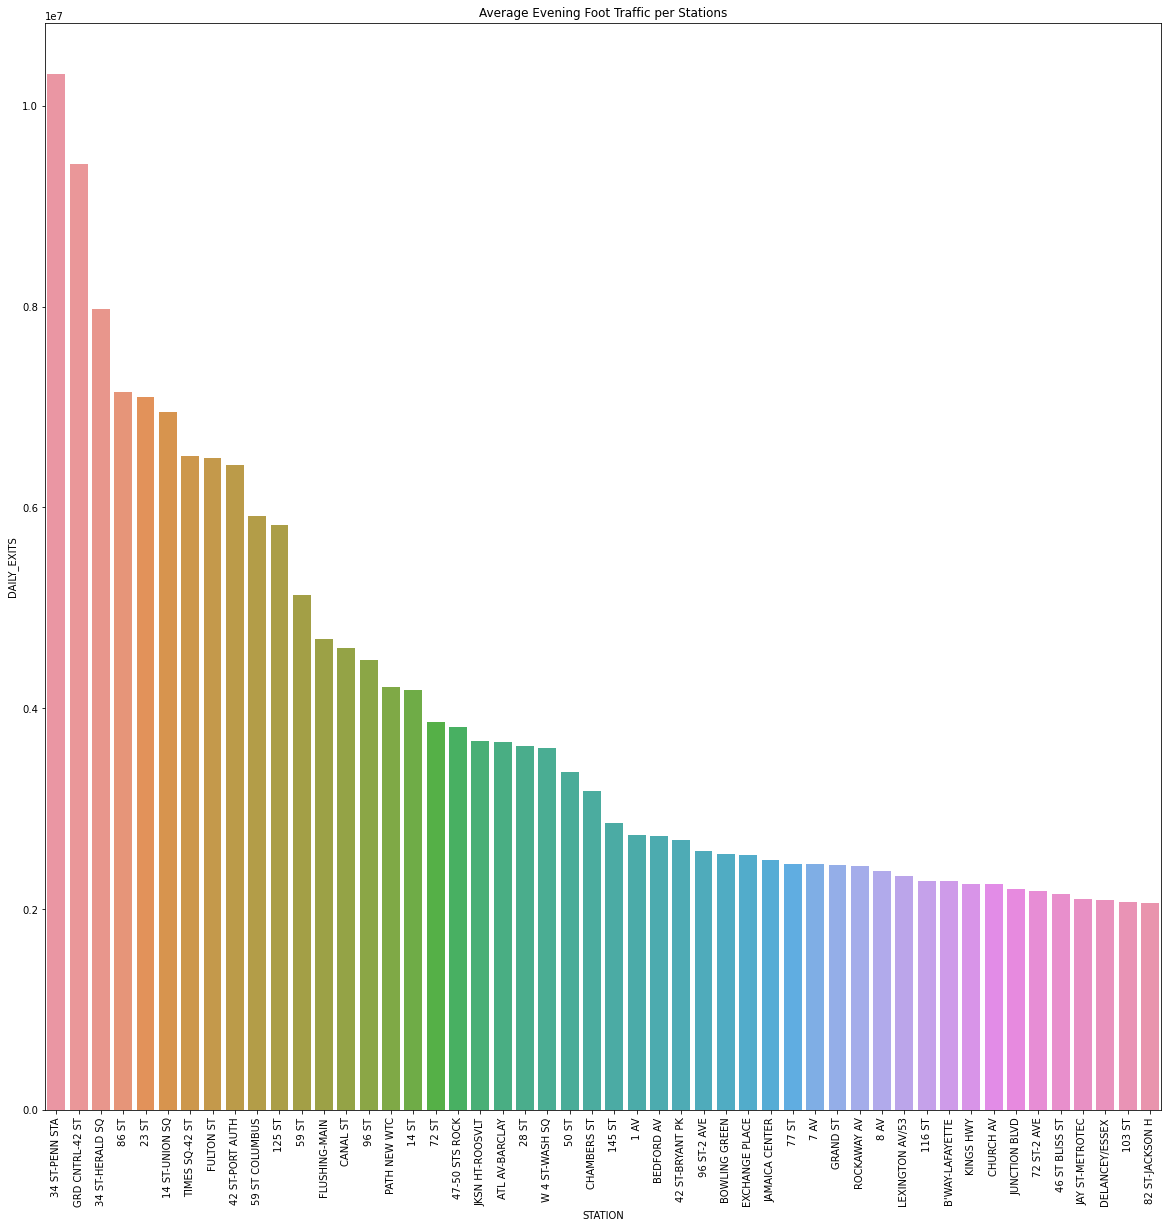

In [266]:
#ploted the top 15 stations onto a bar graph
plt.figure(figsize = (20,20))
sns.barplot(x = station_totals['STATION'], y = station_totals['DAILY_EXITS'])
plt.xticks(rotation = 90)
plt.title('Average Evening Foot Traffic per Stations')
plt.savefig('Station_Totals.pdf')

### Part 5: Plot Station on Google Earth

In [203]:
#Isolated the top 50 stations and plotted them onto Google Earth
station_totals.head(50)

,STATION,DAILY_EXITS
0,34 ST-PENN STA,1.0312e+07
1,GRD CNTRL-42 ST,9.4182e+06
2,34 ST-HERALD SQ,7.9768e+06
3,86 ST,7.1502e+06
4,23 ST,7.1036e+06
5,14 ST-UNION SQ,6.9459e+06
6,TIMES SQ-42 ST,6.5155e+06
7,FULTON ST,6.4914e+06
8,42 ST-PORT AUTH,6.4168e+06
9,59 ST COLUMBUS,5.9121e+06


In [205]:
# I found this data which shows the top 10 neighborhoods by percentage of family households
# Plotted these neighborhoods onto Google Earth 
neighborhoods = pd.read_csv('Neighborhoods.csv')
neighborhoods

,Neighborhood,Families_With_Children
0,Borough Park,0.43
1,Corona,0.40
2,Sunset Park,0.40
3,Mott Haven,0.40
4,Richmond Hill,0.39
5,Tremont,0.38
6,Ozone Park,0.38
7,South Bronx,0.38
8,S Ozone Park,0.35
9,Far Rockaway,0.34


### Part 6: Combine Neighborhood and Station Data

In [206]:
# I found that the top 10 neighborhoods were in 4 main clusters.
# I identified the stations closest to these clusters and grouped them by BYC Borough
# Though Corona is not a Borough, this neighborhood in particular had many high traffic stations, so I made it it's
# ... own cluster
# Built a dictionary corresponding to each cluster

Boroughs = {'Brooklyn': ['KINGS HWY','59 ST','CHURCH AV','ATL AV-BARCLAY'],
           'Queens': ['JAMAICA CENTER'],
           'Corona': ['JUNCTION BLVD','JKSN HT-ROOSVLT'],
           'Bronx': ['125 ST','116 ST','145 ST']}
Boroughs

{'Brooklyn': ['KINGS HWY', '59 ST', 'CHURCH AV', 'ATL AV-BARCLAY'],
 'Queens': ['JAMAICA CENTER'],
 'Corona': ['JUNCTION BLVD', 'JKSN HT-ROOSVLT'],
 'Bronx': ['125 ST', '116 ST', '145 ST']}

In [227]:
#Created a list of these top 11 stations nearest these clusters to sort them by DAILY_EXITS

local_stations = ['KINGS HWY', 
                  '59 ST', 
                  'CHURCH AV', 
                  'ATL AV-BARCLAY', 
                  'JAMAICA CENTER',  
                  'JUNCTION BLVD',  
                  '125 ST', 
                  '116 ST', 
                  '145 ST', 
                  'JKSN HT-ROOSVLT']
local_stations_totals = station_totals[station_totals['STATION'].isin(local_stations)].sort_values('DAILY_EXITS', ascending = False)
local_stations_totals

,STATION,DAILY_EXITS
10,125 ST,5827998.0
11,59 ST,5124644.0
19,JKSN HT-ROOSVLT,3677737.0
20,ATL AV-BARCLAY,3662094.0
25,145 ST,2860069.0
32,JAMAICA CENTER,2490212.0
39,116 ST,2283328.0
41,KINGS HWY,2250961.0
42,CHURCH AV,2250358.0
43,JUNCTION BLVD,2197560.0


In [228]:
# Using the Boroughs dictionary, I built a function to create a Boroughs column through the apply method

def borough(i):
    if i in Boroughs['Brooklyn']:
        return 'Brooklyn'
        
    if i in Boroughs['Queens']:
        return 'Queens'
        
    if i in Boroughs['Corona']:
        return 'Corona'
        
    if i in Boroughs['Bronx']:
        return 'Bronx'
        
local_stations_totals['BOROUGH'] = local_stations_totals['STATION'].apply(borough)

In [229]:
# I calculated the average percentage of family households per neighborhood through a data mask and .mean() method

Brooklyn = neighborhoods[neighborhoods.Neighborhood.isin(['Sunset Park', 'Borough Park'])].Families_With_Children.mean().round(4)
Queens = neighborhoods[neighborhoods.Neighborhood.isin(['Richmond Hill', 'Ozone Park', 'South Ozone Park'])].Families_With_Children.mean().round(4)
Corona = neighborhoods[neighborhoods.Neighborhood.isin(['Corona'])].Families_With_Children.mean().round(4)
Bronx = neighborhoods[neighborhoods.Neighborhood.isin(['Mott Haven', 'South Bronx', 'Tremont'])].Families_With_Children.mean().round(4)

print("Brooklyn Avg: ", Brooklyn)
print("Queens Avg: ", Queens)
print("Corona Avg: ", Corona)
print("Bronx Avg: ", Bronx)

Brooklyn Avg:  0.415
Queens Avg:  0.385
Corona Avg:  0.4
Bronx Avg:  0.3867


In [231]:
# Created a new AVG_FAMILY column by applying the below function and returning the averages calculated above

def borough_avg(i):
    if i == 'Brooklyn':
        return Brooklyn
        
    if i == 'Queens':
        return Queens
        
    if i == 'Corona':
        return Corona
        
    if i == 'Bronx':
        return Bronx
        
local_stations_totals['AVG_FAMILY'] = local_stations_totals['BOROUGH'].apply(borough_avg)
local_stations_totals

,STATION,DAILY_EXITS,BOROUGH,AVG_FAMILY
10,125 ST,5827998.0,Bronx,0.3867
11,59 ST,5124644.0,Brooklyn,0.4150
19,JKSN HT-ROOSVLT,3677737.0,Corona,0.4000
20,ATL AV-BARCLAY,3662094.0,Brooklyn,0.4150
25,145 ST,2860069.0,Bronx,0.3867
32,JAMAICA CENTER,2490212.0,Queens,0.3850
39,116 ST,2283328.0,Bronx,0.3867
41,KINGS HWY,2250961.0,Brooklyn,0.4150
42,CHURCH AV,2250358.0,Brooklyn,0.4150
43,JUNCTION BLVD,2197560.0,Corona,0.4000


### Part 7: Group By Borough and Plot Graphs

In [241]:
# Grouped this dataframe by Borough to compare the DAILY_EXITS and determine which station had the highest traffic

final_result = local_stations_totals.groupby(['BOROUGH','STATION','AVG_FAMILY'])['DAILY_EXITS'].max().reset_index().sort_values('DAILY_EXITS', ascending = False)
bronx = final_result[final_result["BOROUGH"] == 'Bronx'].sort_values('DAILY_EXITS', ascending = False)
brooklyn = final_result[final_result["BOROUGH"] == 'Brooklyn'].sort_values('DAILY_EXITS', ascending = False)
queens = final_result[final_result["BOROUGH"] == 'Queens'].sort_values('DAILY_EXITS', ascending = False)
corona = final_result[final_result["BOROUGH"] == 'Corona'].sort_values('DAILY_EXITS', ascending = False)

In [242]:
final_result

,BOROUGH,STATION,AVG_FAMILY,DAILY_EXITS
1,Bronx,125 ST,0.3867,5827998.0
3,Brooklyn,59 ST,0.4150,5124644.0
7,Corona,JKSN HT-ROOSVLT,0.4000,3677737.0
4,Brooklyn,ATL AV-BARCLAY,0.4150,3662094.0
2,Bronx,145 ST,0.3867,2860069.0
9,Queens,JAMAICA CENTER,0.3850,2490212.0
0,Bronx,116 ST,0.3867,2283328.0
6,Brooklyn,KINGS HWY,0.4150,2250961.0
5,Brooklyn,CHURCH AV,0.4150,2250358.0
8,Corona,JUNCTION BLVD,0.4000,2197560.0


In [233]:
bronx

,BOROUGH,STATION,AVG_FAMILY,DAILY_EXITS
1,Bronx,125 ST,0.3867,5827998.0
2,Bronx,145 ST,0.3867,2860069.0
0,Bronx,116 ST,0.3867,2283328.0


In [234]:
brooklyn

,BOROUGH,STATION,AVG_FAMILY,DAILY_EXITS
3,Brooklyn,59 ST,0.415,5124644.0
4,Brooklyn,ATL AV-BARCLAY,0.415,3662094.0
6,Brooklyn,KINGS HWY,0.415,2250961.0
5,Brooklyn,CHURCH AV,0.415,2250358.0


In [235]:
queens

,BOROUGH,STATION,AVG_FAMILY,DAILY_EXITS
9,Queens,JAMAICA CENTER,0.385,2490212.0


In [236]:
corona

,BOROUGH,STATION,AVG_FAMILY,DAILY_EXITS
7,Corona,JKSN HT-ROOSVLT,0.4,3677737.0
8,Corona,JUNCTION BLVD,0.4,2197560.0


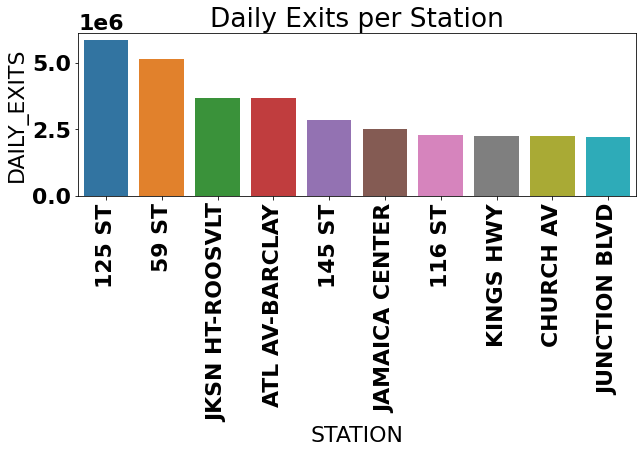

In [282]:
# Plotted all station amongst all Boroughs clusters

plt.figure(figsize = (10, 3))
sns.barplot(x = final_result['STATION'], y = final_result['DAILY_EXITS'])
plt.xticks(rotation = 90)
plt.title('Daily Exits per Station')
plt.savefig('Daily_Exits_Per_Station.png')

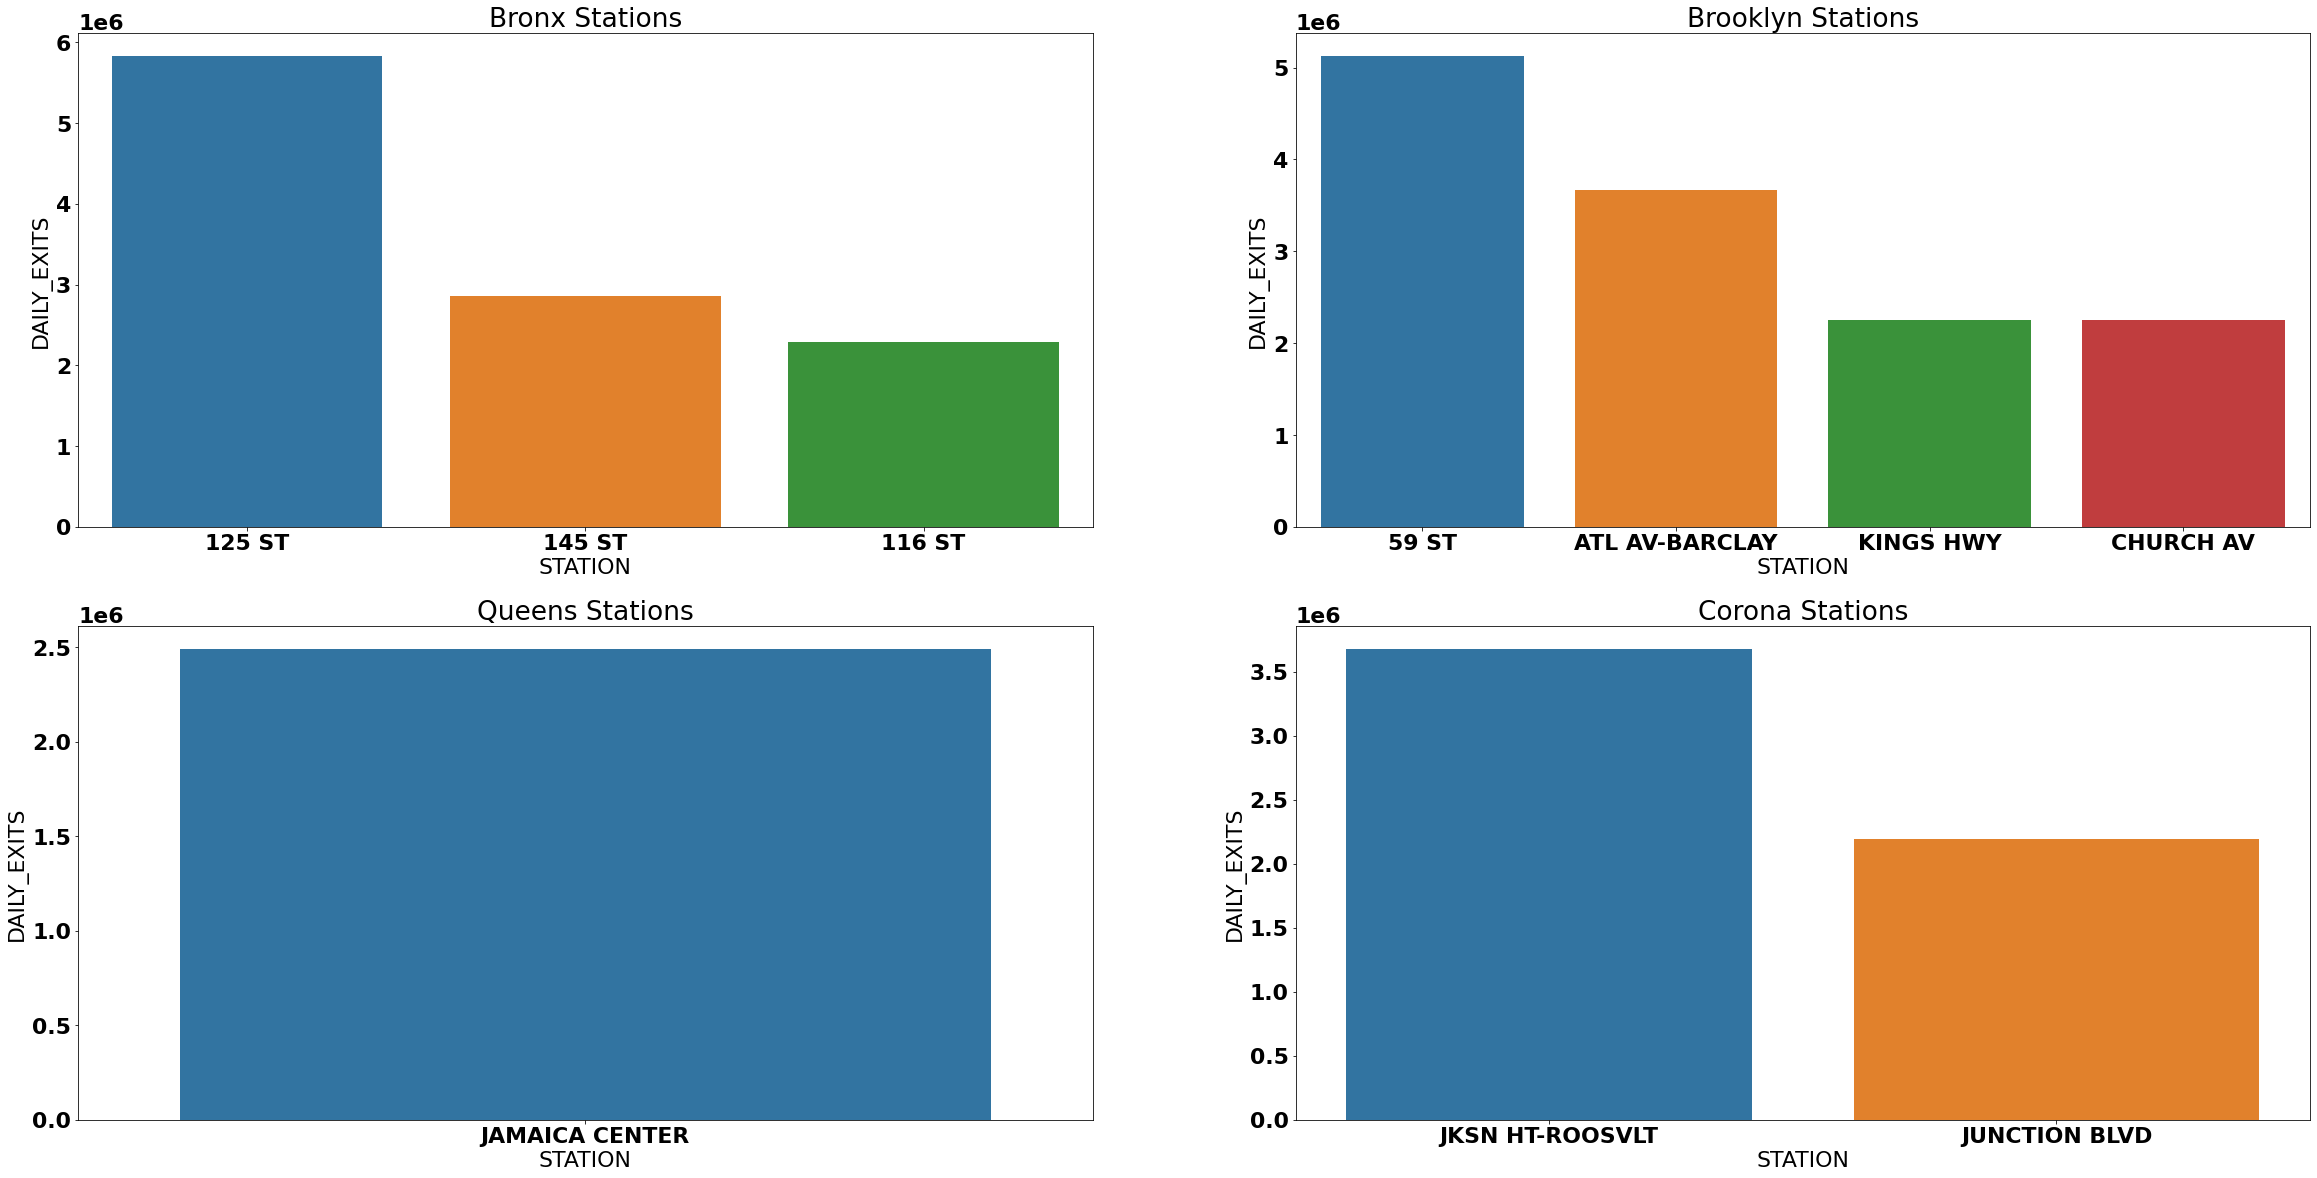

In [272]:
# I then plotted each station by Borough cluster

plt.figure(figsize = (40,20))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.subplot(2,2,1)
sns.barplot(x = bronx['STATION'], y = bronx['DAILY_EXITS'])
plt.title("Bronx Stations")

plt.subplot(2,2,2)
sns.barplot(x = brooklyn['STATION'], y = brooklyn['DAILY_EXITS'])
plt.title('Brooklyn Stations')

plt.subplot(2,2,3)
sns.barplot(x = queens['STATION'], y = queens['DAILY_EXITS'])
plt.title('Queens Stations')

plt.subplot(2,2,4)
sns.barplot(x = corona['STATION'], y = corona['DAILY_EXITS'])
plt.title('Corona Stations')
plt.savefig('Stations_Per_Borough.pdf')

### Part 8: Top Stations by Week

In [253]:
# I wanted to know if certain stations were better for certain days of the week
# I used the local_stations list above to filter the original turnstiles_df for only the local stations I found

final_stations = turnstiles_df[turnstiles_df['STATION'].isin(local_stations)]

In [254]:
# Next I grouped these stations by day of the week to determine which stations had the most foot traffic pe weekday

final_stations['DAY_OF_WEEK'] = pd.to_datetime(final_stations['DATE']).dt.dayofweek
x = final_stations.groupby(['DAY_OF_WEEK', 'STATION']).EXITS.max().reset_index()

/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_27324/2518713839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stations['DAY_OF_WEEK'] = pd.to_datetime(final_stations['DATE']).dt.dayofweek


In [273]:
Monday = x[x['DAY_OF_WEEK'] == 0].sort_values('EXITS', ascending = False)
Monday.head(3)

,DAY_OF_WEEK,STATION,EXITS
1,0,125 ST,2013750312
5,0,CHURCH AV,1578091840
2,0,145 ST,406555995


In [274]:
Tuesday = x[x['DAY_OF_WEEK'] == 1].sort_values('EXITS', ascending = False)
Tuesday.head(3)

,DAY_OF_WEEK,STATION,EXITS
11,1,125 ST,2013752307
15,1,CHURCH AV,1578092251
12,1,145 ST,406557701


In [275]:
Wednesday = x[x['DAY_OF_WEEK'] == 2].sort_values('EXITS', ascending = False)
Wednesday.head(3)

,DAY_OF_WEEK,STATION,EXITS
21,2,125 ST,2013754337
25,2,CHURCH AV,1578092698
22,2,145 ST,406559487


In [276]:
Thursday = x[x['DAY_OF_WEEK'] == 3].sort_values('EXITS', ascending = False)
Thursday.head(3)

,DAY_OF_WEEK,STATION,EXITS
31,3,125 ST,2013756176
35,3,CHURCH AV,1578093095
32,3,145 ST,406561219


In [277]:
Friday = x[x['DAY_OF_WEEK'] == 4].sort_values('EXITS', ascending = False)
Friday.head(3)

,DAY_OF_WEEK,STATION,EXITS
41,4,125 ST,2013758109
45,4,CHURCH AV,1578093541
42,4,145 ST,406562909


In [280]:
Saturday = x[x['DAY_OF_WEEK'] == 5].sort_values('EXITS', ascending = False)
Saturday.head(3)

,DAY_OF_WEEK,STATION,EXITS
51,5,125 ST,2013747690
55,5,CHURCH AV,1578091234
52,5,145 ST,406553405


In [281]:
Sunday = x[x['DAY_OF_WEEK'] == 6].sort_values('EXITS', ascending = False)
Sunday.head(3)

,DAY_OF_WEEK,STATION,EXITS
61,6,125 ST,2013748514
65,6,CHURCH AV,1578091448
62,6,145 ST,406554486


In [ ]:
# It turns out that the 125 St station sees the most traffic across every day of the week compared 
# . . . to all other stations
